In [1]:
# NOTE: 

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

crime = pd.read_csv('E:/Vancouver Crime Final/Synthetic Data/both_bne_500k_notwithin_1week_100m.csv')

crime.head(20)

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.12,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,Break and Enter Commercial,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.95,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.11,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.46,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,Break and Enter Residential/Other,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.84,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
5,Break and Enter Residential/Other,2003-01-01 04:04:00,2003,1,1,4,0,4.000000,25XX GRAVELEY ST,496100.23,...,0,7,73,21.6,0.0,21.6,5.5,88.0,101.70,9.53
6,Break and Enter Residential/Other,2003-01-01 04:04:00,2003,1,1,4,30,4.500000,15XX SE MARINE DR,494572.37,...,1,0,41,21.6,0.0,21.6,5.5,88.0,101.70,9.53
7,Break and Enter Commercial,2003-01-01 06:06:00,2003,1,1,6,0,6.000000,5XX W GEORGIA ST,491507.39,...,10,2,27,21.6,0.0,21.6,5.5,96.0,101.58,9.53
8,Break and Enter Commercial,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,18XX W 57TH AVE,489132.03,...,0,8,73,21.6,0.0,21.6,5.8,95.0,101.50,9.53
9,Break and Enter Commercial,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,45XX FRASER ST,493431.80,...,2,2,19,21.6,0.0,21.6,5.8,95.0,101.50,9.53


In [2]:
# Set Break and ENters to 1 and everything else to 0

crime = crime.replace(['NONE'], 0)

crime = crime.replace(['Break and Enter Residential/Other', 'Break and Enter Commercial'], 1)
crime.head()

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.12,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.95,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.11,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.46,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.84,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53


In [3]:
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.120000,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.950000,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.110000,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.460000,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.840000,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552758,0,2013-07-23 01:23:00,2013,7,23,1,23,1.383333,8XX W 37TH AVE,490975.209866,...,0,6,43,0.0,0.0,0.0,15.8,88.0,101.67,16.83
552759,0,2016-10-29 16:05:00,2016,10,29,16,5,16.083333,40XX BOUNDARY RD,498263.140760,...,0,4,27,6.4,0.0,6.4,11.0,89.0,101.34,11.08
552760,0,2006-10-03 09:29:00,2006,10,3,9,29,9.483333,42XX YUKON ST,491831.626717,...,0,8,67,0.0,0.0,0.0,11.9,84.0,102.09,12.58
552761,0,2005-02-02 05:29:00,2005,2,2,5,29,5.483333,19XX W 39TH AVE,489136.700000,...,0,8,69,0.0,0.0,0.0,8.2,90.0,102.93,10.63


In [4]:
### Begin Processing the Data


# Import Pre-processing module
from sklearn import preprocessing

# Create Label Encoder
le = preprocessing.LabelEncoder()

# Convert the string columns to numeric
# .astype(str) to ensude they are read as strings and not as mixed types
crime['datetime'] = le.fit_transform(crime['datetime'].astype(str))
crime['hundred_block'] = le.fit_transform(crime['hundred_block'].astype(str))


# Display the results
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0,2003,1,1,0,0,0.000000,14804,490791.120000,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,0,2003,1,1,0,0,0.000000,11850,495220.950000,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,0,2003,1,1,0,1,0.016667,7276,486837.110000,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,0,2003,1,1,0,20,0.333333,2686,495279.460000,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,5,2003,1,1,1,46,1.766667,9186,492627.840000,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552758,0,319294,2013,7,23,1,23,1.383333,14418,490975.209866,...,0,6,43,0.0,0.0,0.0,15.8,88.0,101.67,16.83
552759,0,418251,2016,10,29,16,5,16.083333,8571,498263.140760,...,0,4,27,6.4,0.0,6.4,11.0,89.0,101.34,11.08
552760,0,113443,2006,10,3,9,29,9.483333,8893,491831.626717,...,0,8,67,0.0,0.0,0.0,11.9,84.0,102.09,12.58
552761,0,63125,2005,2,2,5,29,5.483333,2739,489136.700000,...,0,8,69,0.0,0.0,0.0,8.2,90.0,102.93,10.63


In [5]:
# Scale the Data

columns = [col for col in crime if col not in ['type']]


# Properly scale the reduced set of features
features = crime[columns]

from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()

print(scaler.fit(features))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [6]:
# Properly scale the features

columns = [col for col in crime if col not in ['type']]

# Properly scale the reduced set of features
features = crime[columns]


scaler = MinMaxScaler().fit(features.values) # scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values) # features = scaler.transform(features.values)
crime[columns] = features
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.673368,0.485327,...,0.133333,0.000000,0.244275,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
1,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.539004,0.788720,...,0.133333,0.151515,0.305344,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
2,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.016949,0.000695,0.330953,0.214522,...,0.200000,0.181818,0.290076,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
3,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.338983,0.013899,0.122174,0.792727,...,0.066667,0.242424,0.671756,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
4,1,0.000010,0.0000,0.000000,0.000000,0.043478,0.779661,0.073662,0.417830,0.611121,...,0.133333,0.242424,0.633588,0.235808,0.0,0.235808,0.416842,0.747126,0.616107,0.010909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552758,0,0.633335,0.6250,0.545455,0.733333,0.043478,0.389831,0.057679,0.655811,0.497935,...,0.000000,0.181818,0.328244,0.000000,0.0,0.000000,0.618947,0.862069,0.608054,0.895758
552759,0,0.829621,0.8125,0.818182,0.933333,0.695652,0.084746,0.670605,0.389857,0.997076,...,0.000000,0.121212,0.206107,0.069869,0.0,0.069869,0.517895,0.873563,0.563758,0.198788
552760,0,0.225020,0.1875,0.818182,0.066667,0.391304,0.491525,0.395413,0.404503,0.556590,...,0.000000,0.242424,0.511450,0.000000,0.0,0.000000,0.536842,0.816092,0.664430,0.380606
552761,0,0.125211,0.1250,0.090909,0.033333,0.217391,0.491525,0.228631,0.124585,0.372018,...,0.000000,0.242424,0.526718,0.000000,0.0,0.000000,0.458947,0.885057,0.777181,0.144242


In [7]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(386934, 29)


In [8]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.03467108 0.01694779 0.01305226 0.02100286 0.01858355 0.30665725
 0.04089491 0.10233664 0.0373001  0.04078894 0.04359011 0.03834066
 0.01053071 0.01495017 0.01968477 0.03120609 0.00229717 0.00262002
 0.01106955 0.01802189 0.0216264  0.02962392 0.01218403 0.00137636
 0.01216313 0.0251277  0.02222148 0.02631551 0.02481491]
[ True False False False False  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False]


,importance
minute,0.306657
hundred_block,0.102337
latitude,0.043590
Hour_Minute,0.040895
utm_y,0.040789
longitude,0.038341
utm_x,0.037300
datetime,0.034671
light_pole_100,0.031206
trees_100,0.029624


In [9]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'latitude', 'longitude', 'hour', 'minute', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(386934, 24)


In [10]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.04179463 0.02334117 0.03750508 0.07902502 0.15190642 0.08004081
 0.08847966 0.01680038 0.02459482 0.03606307 0.05417375 0.00317585
 0.00428736 0.01506104 0.02881757 0.0365672  0.05589477 0.02147702
 0.0018111  0.02190405 0.04545151 0.04061325 0.04652019 0.04469428]
[ True False False  True  True  True  True False False False  True False
 False False False False  True False False False  True False  True  True]


,importance
hundred_block,0.151906
utm_y,0.088480
utm_x,0.080041
Hour_Minute,0.079025
trees_100,0.055895
light_pole_100,0.054174
pressure,0.046520
temp_c,0.045452
hours_of_light,0.044694
year,0.041795


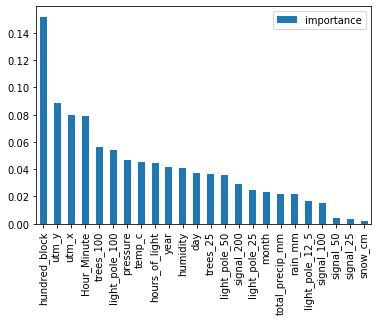

In [11]:
feature_importances.plot.bar()

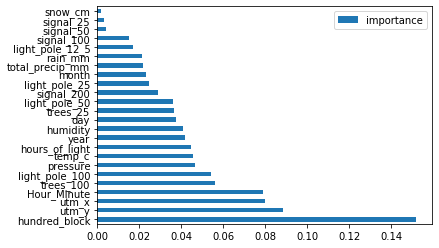

In [12]:
feature_importances.plot.barh()

In [13]:
# Simple Neural Network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# import needed modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [14]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[306325   7639]
 [ 56155  16815]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91    313964
           1       0.69      0.23      0.35     72970

    accuracy                           0.84    386934
   macro avg       0.77      0.60      0.63    386934
weighted avg       0.82      0.84      0.80    386934



In [16]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[131261   3401]
 [ 24204   6963]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90    134662
           1       0.67      0.22      0.34     31167

    accuracy                           0.83    165829
   macro avg       0.76      0.60      0.62    165829
weighted avg       0.81      0.83      0.80    165829



In [32]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'latitude', 'longitude', 'Hour_Minute', 'minute', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(386934, 24)


In [33]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.04364346 0.0246256  0.03913263 0.04165623 0.15222    0.08393477
 0.09204908 0.0179342  0.02586112 0.03782724 0.05635838 0.00370079
 0.00438382 0.01639126 0.02942517 0.03845032 0.05848595 0.02256367
 0.00193271 0.02293613 0.04780744 0.04236256 0.04936497 0.04695253]
[ True False False False  True  True  True False False False  True False
 False False False False  True False False False  True  True  True  True]


,importance
hundred_block,0.152220
utm_y,0.092049
utm_x,0.083935
trees_100,0.058486
light_pole_100,0.056358
pressure,0.049365
temp_c,0.047807
hours_of_light,0.046953
year,0.043643
humidity,0.042363


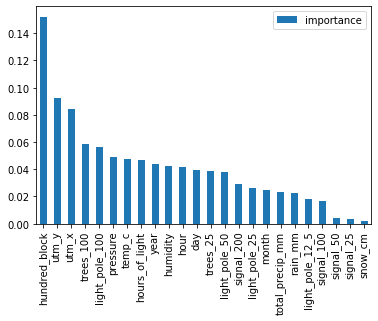

In [34]:
feature_importances.plot.bar()

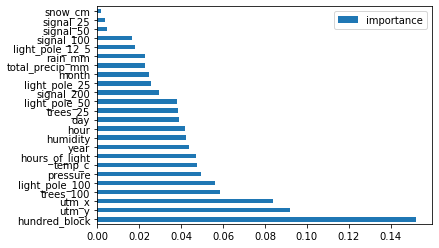

In [35]:
feature_importances.plot.barh()

In [36]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [37]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[305343   8621]
 [ 55502  17468]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90    313964
           1       0.67      0.24      0.35     72970

    accuracy                           0.83    386934
   macro avg       0.76      0.61      0.63    386934
weighted avg       0.81      0.83      0.80    386934



In [38]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[130801   3861]
 [ 23888   7279]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90    134662
           1       0.65      0.23      0.34     31167

    accuracy                           0.83    165829
   macro avg       0.75      0.60      0.62    165829
weighted avg       0.81      0.83      0.80    165829



In [39]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'latitude', 'longitude', 'Hour_Minute', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(386934, 25)


In [40]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.02870395 0.0158659  0.02555772 0.0292034  0.32498    0.11786252
 0.05151155 0.06042359 0.01192581 0.01732237 0.02369306 0.03650321
 0.00217028 0.0031021  0.01214377 0.02338552 0.02502511 0.0362993
 0.01482682 0.00163905 0.01479504 0.03163215 0.0279065  0.03259003
 0.03093125]
[False False False False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False]


,importance
minute,0.324980
hundred_block,0.117863
utm_y,0.060424
utm_x,0.051512
light_pole_100,0.036503
trees_100,0.036299
pressure,0.032590
temp_c,0.031632
hours_of_light,0.030931
hour,0.029203


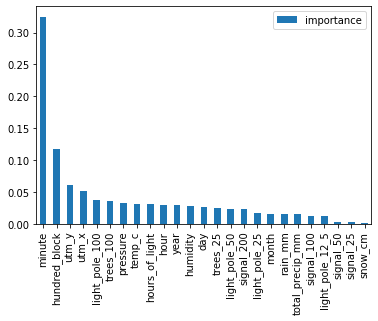

In [41]:
feature_importances.plot.bar()

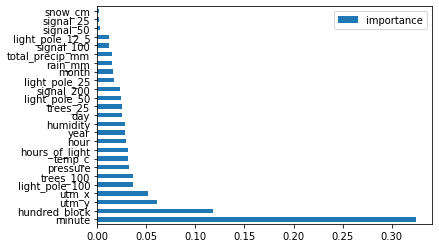

In [42]:
feature_importances.plot.barh()

In [43]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(25, 25, 25), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [44]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[303189  10775]
 [ 26385  46585]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94    313964
           1       0.81      0.64      0.71     72970

    accuracy                           0.90    386934
   macro avg       0.87      0.80      0.83    386934
weighted avg       0.90      0.90      0.90    386934



In [45]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[129960   4702]
 [ 11506  19661]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94    134662
           1       0.81      0.63      0.71     31167

    accuracy                           0.90    165829
   macro avg       0.86      0.80      0.82    165829
weighted avg       0.90      0.90      0.90    165829

